In [2]:
#Import dependencies
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
df = pd.read_csv("futuristic_city_traffic.csv")
df1 = df

In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12791 entries, 0 to 12790
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   City                   12791 non-null  object 
 1   Vehicle Type           12791 non-null  object 
 2   Weather                12791 non-null  object 
 3   Economic Condition     12791 non-null  object 
 4   Day Of Week            12790 non-null  object 
 5   Hour Of Day            12790 non-null  float64
 6   Speed                  12790 non-null  float64
 7   Is Peak Hour           12790 non-null  float64
 8   Random Event Occurred  12790 non-null  float64
 9   Energy Consumption     12790 non-null  float64
 10  Traffic Density        12790 non-null  float64
dtypes: float64(6), object(5)
memory usage: 1.1+ MB


Figure(1000x400)


<Axes: xlabel='Weather'>

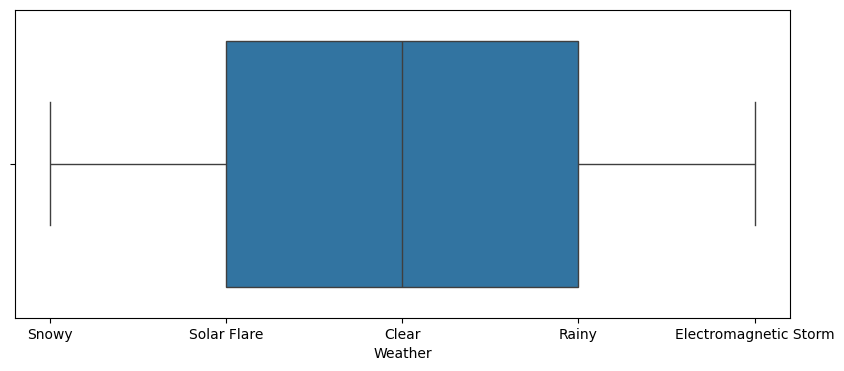

In [8]:
#Checking outliers using boxplot
print(plt.figure(figsize = (10, 4), dpi = 100))
sns.boxplot(x = "Weather", data = df1)

In [9]:
# finding IQR
percentile25 = df1['Traffic Density'].quantile(0.25)
percentile75 = df1['Traffic Density'].quantile(0.75)
iqr = percentile75 - percentile25

In [10]:
# finding upper and lower limit
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

In [11]:
# finding outliers using iqr
df1[df1['Traffic Density'] > upper_limit]
df1[df1['Traffic Density'] < lower_limit]

,City,Vehicle Type,Weather,Economic Condition,Day Of Week,Hour Of Day,Speed,Is Peak Hour,Random Event Occurred,Energy Consumption,Traffic Density


In [13]:
# trimming outliers
new_df = df1[df1['Traffic Density'] < upper_limit]
new_df.shape

(12530, 11)

<ipython-input-14-e17d0d8c30df>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1['Traffic Density'])
<ipython-input-14-e17d0d8c30df>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df['Traffic Density'])


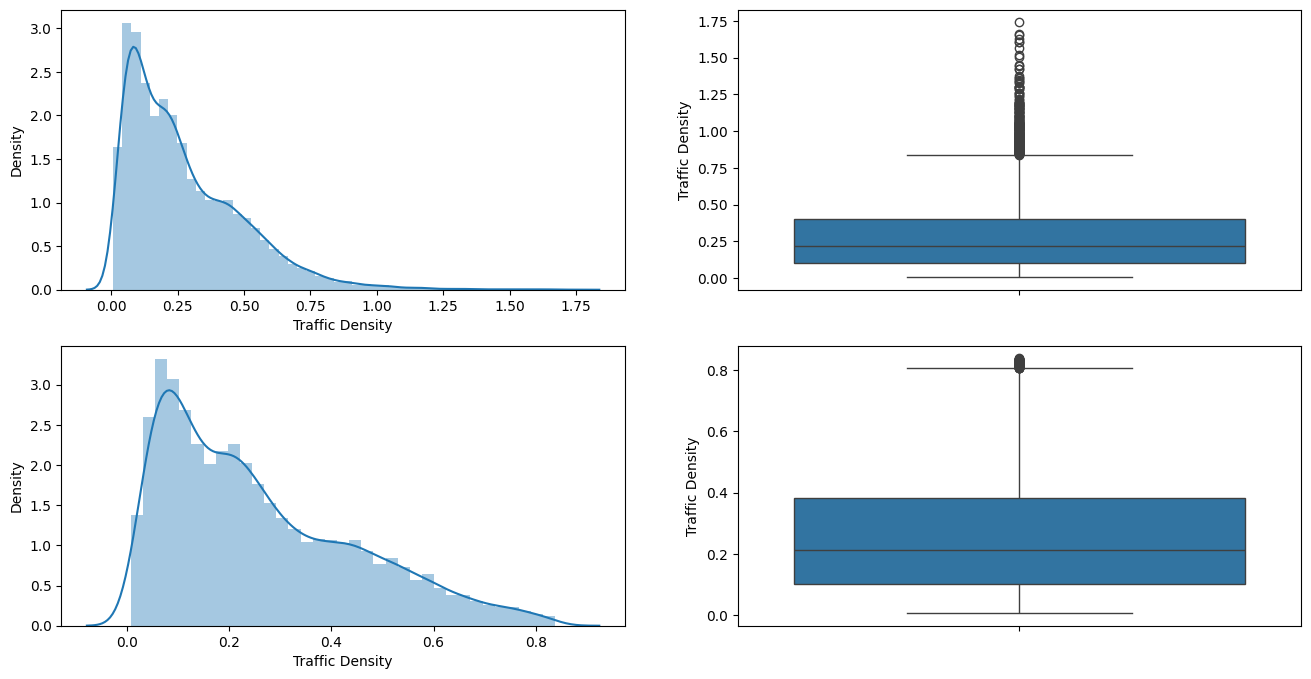

In [14]:
# compare plots after trimming
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df1['Traffic Density'])
plt.subplot(2,2,2)
sns.boxplot(df1['Traffic Density'])
plt.subplot(2,2,3)
sns.distplot(new_df['Traffic Density'])
plt.subplot(2,2,4)
sns.boxplot(new_df['Traffic Density'])
plt.show()

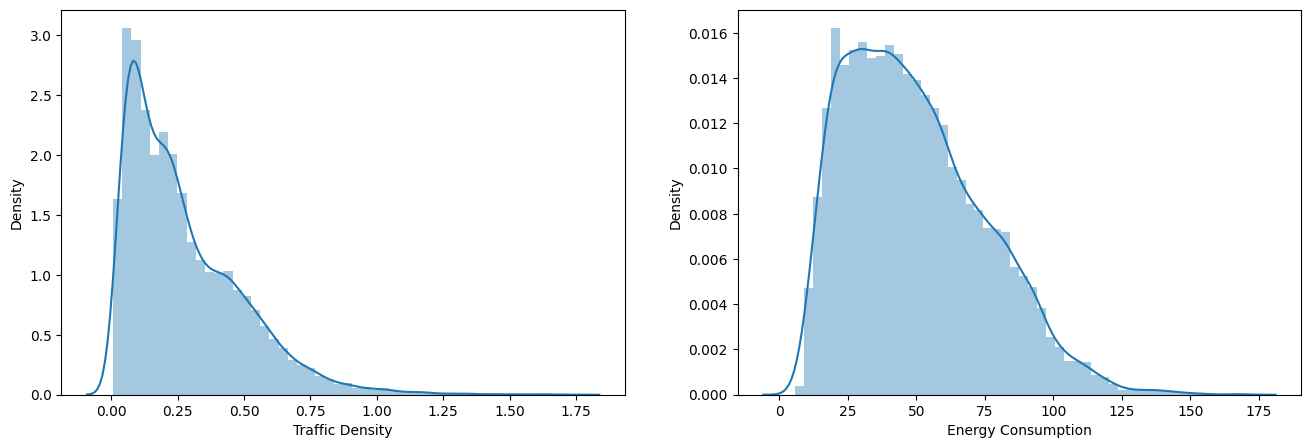

In [26]:
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df1['Traffic Density'])
plt.subplot(1,2,2)
sns.distplot(df1['Energy Consumption'])
plt.show()

In [27]:
# finding boundary values for bmi using z-score
print("Highest allowed",df1['Energy Consumption'].mean() + 3*df1['Energy Consumption'].std())
print("Lowest allowed",df1['Energy Consumption'].mean() - 3*df1['Energy Consumption'].std())

Highest allowed 125.49952783489903
Lowest allowed -26.279516685563607


In [28]:
# finding outliers for bmi
df1[(df1['Energy Consumption'] > 48.95) | (df1['Energy Consumption'] < 12.368)]

,City,Vehicle Type,Weather,Economic Condition,Day Of Week,Hour Of Day,Speed,Is Peak Hour,Random Event Occurred,Energy Consumption,Traffic Density
1,AquaCity,Flying Car,Solar Flare,Recession,Wednesday,2.0,118.8000,0.0,0.0,143.5682,0.3208
2,Neuroburg,Autonomous Vehicle,Solar Flare,Recession,Wednesday,16.0,100.3904,0.0,0.0,91.2640,0.0415
12,TechHaven,Autonomous Vehicle,Clear,Recession,Sunday,7.0,87.8801,0.0,0.0,79.8910,0.1248
13,Neuroburg,Autonomous Vehicle,Electromagnetic Storm,Recession,Sunday,10.0,60.0447,0.0,0.0,57.4590,0.0342
15,Ecoopolis,Car,Rainy,Booming,Friday,9.0,66.8856,0.0,0.0,66.8856,0.2521
...,...,...,...,...,...,...,...,...,...,...,...
12781,AquaCity,Flying Car,Rainy,Recession,Sunday,18.0,56.8110,0.0,0.0,68.1732,0.3396
12782,Ecoopolis,Flying Car,Solar Flare,Recession,Wednesday,23.0,43.1710,0.0,0.0,51.8052,0.1899
12783,Ecoopolis,Autonomous Vehicle,Clear,Recession,Tuesday,4.0,77.8586,0.0,0.0,62.2869,0.1051
12788,MetropolisX,Autonomous Vehicle,Rainy,Recession,Friday,4.0,59.9147,0.0,0.0,57.3346,0.0745


In [29]:
# Trimming of outliers for bmi
new_df1 = df1[(df1['Energy Consumption'] < 48.95) & (df1['Energy Consumption'] > 12.368)]
new_df1

,City,Vehicle Type,Weather,Economic Condition,Day Of Week,Hour Of Day,Speed,Is Peak Hour,Random Event Occurred,Energy Consumption,Traffic Density
0,SolarisVille,Drone,Snowy,Stable,Sunday,20.0,29.4268,0.0,0.0,14.7134,0.5241
3,Ecoopolis,Drone,Clear,Booming,Thursday,8.0,76.8000,1.0,0.0,46.0753,0.1811
4,AquaCity,Autonomous Vehicle,Solar Flare,Stable,Saturday,16.0,45.2176,0.0,0.0,40.1934,0.4544
5,TechHaven,Autonomous Vehicle,Snowy,Recession,Thursday,20.0,30.5179,0.0,0.0,37.5562,0.0843
6,Ecoopolis,Autonomous Vehicle,Rainy,Recession,Monday,21.0,43.9222,0.0,0.0,39.0420,0.0293
...,...,...,...,...,...,...,...,...,...,...,...
12780,TechHaven,Autonomous Vehicle,Clear,Recession,Wednesday,5.0,25.6189,0.0,0.0,23.2899,0.0543
12784,AquaCity,Autonomous Vehicle,Electromagnetic Storm,Stable,Saturday,11.0,56.9182,0.0,0.0,45.5346,0.5074
12785,Neuroburg,Drone,Electromagnetic Storm,Booming,Tuesday,11.0,34.9190,0.0,0.0,20.8846,0.1269
12786,Neuroburg,Autonomous Vehicle,Snowy,Stable,Sunday,1.0,50.7100,0.0,0.0,48.5263,0.0703


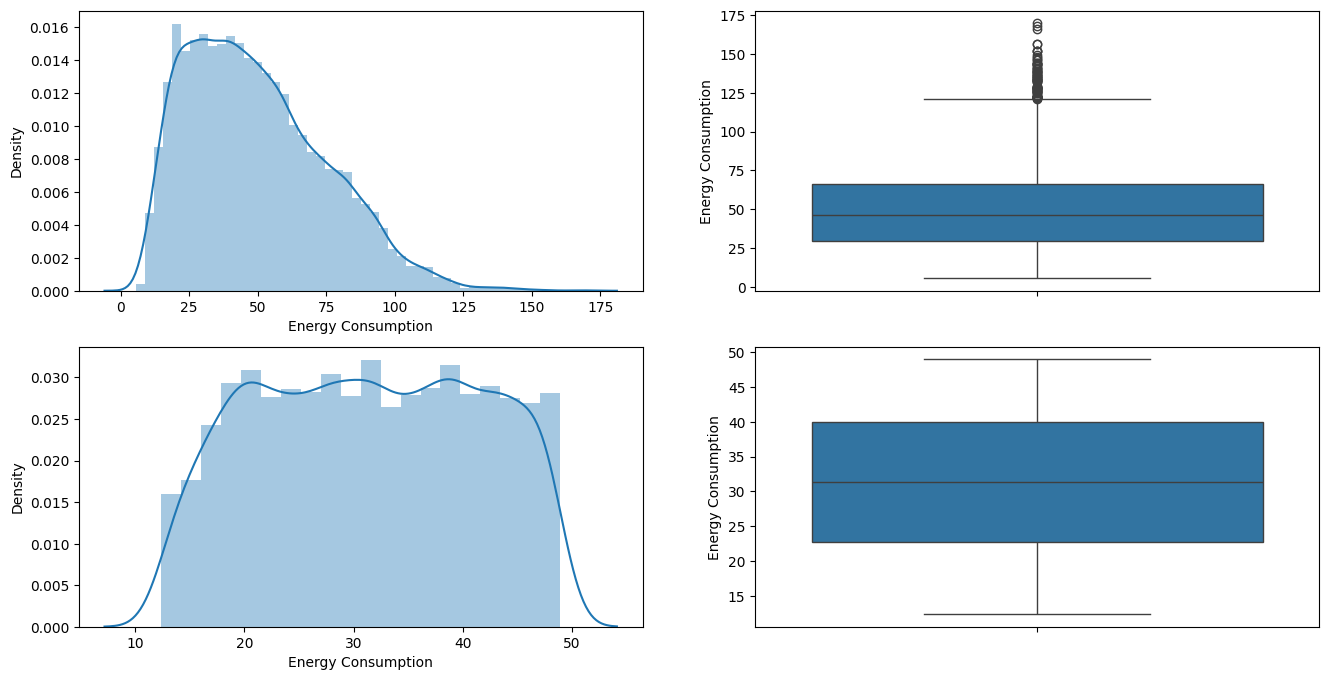

In [30]:
# compare plots after trimming
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df1['Energy Consumption'])
plt.subplot(2,2,2)
sns.boxplot(df1['Energy Consumption'])
plt.subplot(2,2,3)
sns.distplot(new_df1['Energy Consumption'])
plt.subplot(2,2,4)
sns.boxplot(new_df1['Energy Consumption'])
plt.show()